# Laboratorio 1
## Grupo 23
Sebastian Maldonado Velandia - 202215378

Nicolas Mauricio Gomez A. - 202024568

- Origen del circulo [8, 15.3534]
- Diametro 2

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame

In [3]:
# Parámetros del círculo
radio = 1  # Radio de la circunferencia
centro_x, centro_y = 8, 15.3534  # Centro de la circunferencia
num_puntos = 13

# Generar puntos en la circunferencia
theta_c = np.linspace(0, 2 * np.pi, num_puntos)
trayectoria_x = centro_x + radio * np.cos(theta_c)
trayectoria_y = centro_y + radio * np.sin(theta_c)
trayectoria_c = np.array([trayectoria_x, trayectoria_y])

In [53]:
# Definir el marco de referencia
N = ReferenceFrame('N')

# Definir las variables dinámicas
theta, beta= dynamicsymbols('theta beta')

# Definir la longotud de los brazos
l = 9.5

# definir marcos de referencias en los brazos
A = N.orientnew('A', 'Axis', [theta, N.z])
B = A.orientnew('B', 'Axis', [beta, A.z])

# Defir los vectores del brazo 

a = l * A.x
b = l * B.x

R = a + b
R.express(N).simplify()


(9.5*cos(beta(t) + theta(t)) + 9.5*cos(theta(t)))*N.x + (9.5*sin(beta(t) + theta(t)) + 9.5*sin(theta(t)))*N.y

In [ ]:
pos_punta = [R.dot(N.x), R.dot(N.y)]

R.lamda = sp.lambdify((theta, beta), pos_punta)
R.lamda(0, 0) # angulos en radianes, si se usa pi asegurarse que es de numpy

[np.float64(19.0), np.float64(0.0)]

In [6]:
from scipy.optimize import minimize

def encontrar_angulos(x_deseado, y_deseado):
    def error(angulos_iniciales):
        theta, beta = angulos_iniciales
        x, y = R.lamda(theta, beta)
        return (x - x_deseado)**2 + (y - y_deseado)**2
    
    angulos_iniciales = [0, 0]
    res = minimize(error, angulos_iniciales)
    
    return res.x

In [ ]:
from matplotlib.animation import FuncAnimation


# Crear figura y ejes
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_title("Animación del Brazo Robótico en la Trayectoria Circular")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(True)

# Ajustar los límites de los ejes
ax.set_xlim(0, 12.5)
ax.set_ylim(0, 20)

# Dibujo de la circunferencia de la trayectoria
ax.plot(trayectoria_x, trayectoria_y, 'k--', lw=1)

# Inicializar las líneas del brazo
linea_brazo1, = ax.plot([], [], 'r-', lw=2)
linea_brazo2, = ax.plot([], [], 'b-', lw=2)
punto, = ax.plot([], [], 'ro')

# Función de inicialización
def init():
    linea_brazo1.set_data([], [])
    linea_brazo2.set_data([], [])
    punto.set_data([], [])
    return linea_brazo1, linea_brazo2, punto

# Función de actualización de la animación
def actualizar(i):
    x_deseado, y_deseado = trayectoria_x[i], trayectoria_y[i]
    
    # Encontrar los ángulos que llevan la punta del brazo a la posición deseada
    angulos = encontrar_angulos(x_deseado, y_deseado)
    
    if angulos is None:
        return linea_brazo1, linea_brazo2, punto  # No actualiza si no encuentra solución
    
    theta, beta = angulos
    
    # Calcular posiciones de las articulaciones
    x1, y1 = l * np.cos(theta), l * np.sin(theta)
    x2, y2 = x1 + l * np.cos(theta + beta), y1 + l * np.sin(theta + beta)
    
    # Actualizar los datos de las líneas del brazo
    linea_brazo1.set_data([0, x1], [0, y1])
    linea_brazo2.set_data([x1, x2], [y1, y2])
    punto.set_data([x_deseado], [y_deseado])  # Corrección: se pasa como una lista
    
    return linea_brazo1, linea_brazo2, punto

# Crear la animación
anim = FuncAnimation(fig, actualizar, frames=num_puntos, init_func=init, blit=False, interval=70)
plt.close('all')
# Mostrar la animación
from IPython.display import HTML
HTML(anim.to_jshtml())


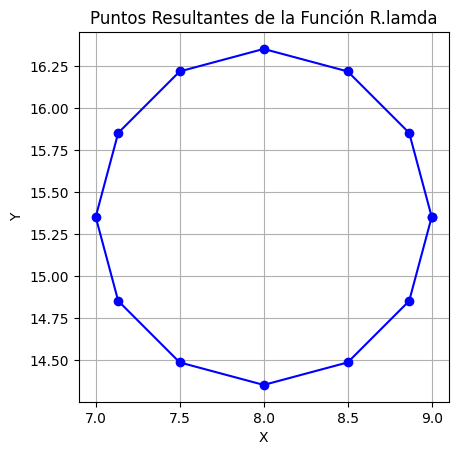

In [8]:
# Crear figura y ejes
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_title("Puntos Resultantes de la Función R.lamda")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(True)

# Listas para almacenar los puntos resultantes
x_points = []
y_points = []

# Graficar cada punto resultante de la función R.lamda
for i in range(trayectoria_c.shape[1]):
    angulos = encontrar_angulos(trayectoria_c[0][i], trayectoria_c[1][i])
    x, y = R.lamda(*angulos)
    x_points.append(x)
    y_points.append(y)
    ax.plot(x, y, 'bo')  # 'bo' para puntos azules

# Conectar los puntos con líneas
ax.plot(x_points, y_points, 'b-')  # 'b-' para líneas azules

plt.show()

In [142]:
radianes = np.array([
    [0.68288871, 0.71556972],
    [0.76316064, 0.59543588],
    [0.81810215, 0.53996406],
    [0.82558861, 0.58048296],
    [0.79097715, 0.69338877],
    [0.73260308, 0.83068444],
    [0.66541925, 0.95521359],
    [0.60189707, 1.04228335],
    [0.55485355, 1.07648367],
    [0.53639024, 1.0518607],
    [0.55384986, 0.97270112],
    [0.60619566, 0.85292431],
    [0.68288871, 0.71556972]
])

grados = np.degrees(radianes)


steps = []
j = 0
print("osc1\nmacro osc\nmaxspd all 5\n")

while j < 13:
    mot1 = int(round(grados[j][0] * 70 / 3, 0))
    mot2 = int(round(grados[j][1] * 70 / 3, 0))

    steps.append([grados[j][0] * 70 / 3, grados[j][1] * 70 / 3])

    j += 1

    print("move 1 to {}, 2 to {}".format(mot1, mot2))

print("end")

osc1
macro osc
maxspd all 5

move 1 to 913, 2 to 957
move 1 to 1020, 2 to 796
move 1 to 1094, 2 to 722
move 1 to 1104, 2 to 776
move 1 to 1057, 2 to 927
move 1 to 979, 2 to 1111
move 1 to 890, 2 to 1277
move 1 to 805, 2 to 1393
move 1 to 742, 2 to 1439
move 1 to 717, 2 to 1406
move 1 to 740, 2 to 1300
move 1 to 810, 2 to 1140
move 1 to 913, 2 to 957
end


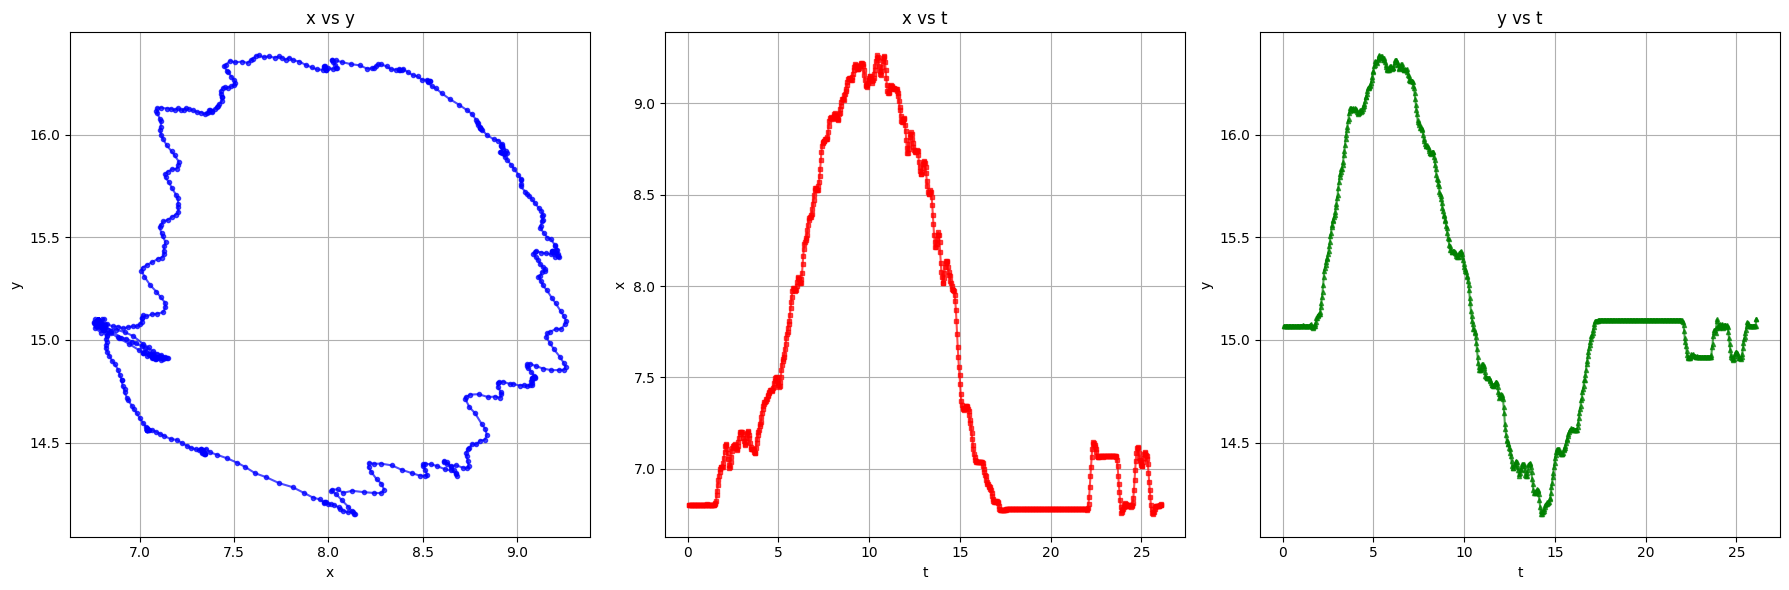

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [134]:
import pandas as pd

# Ruta del archivo
file_path = r"C:\Users\USUARIO\Downloads\Dinamica de Sistemas\data\Libro2.csv"

# Cargar el CSV tomando las seis primeras columnas
data = pd.read_csv(file_path, delimiter=';', usecols=[0, 1, 2])

# Renombrar las columnas correctamente
data.columns = ['t', 'x', 'y']

# Reemplazar comas por puntos y convertir a números
data = data.replace(',', '.', regex=True)
data[['t', 'x', 'y']] = data[['t', 'x', 'y']].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con NaN
data = data.dropna(subset=['t', 'x', 'y'])

# Extraer datos corregidos
t, x, y = data['t'], data['x'], data['y']

# Crear las gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfica x vs y
axes[0].plot(x, y, 'b-', marker='o', markersize=3, alpha=0.7)
axes[0].set_title('x vs y')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True)

# Gráfica x vs t
axes[1].plot(t, x, 'r-', marker='s', markersize=3, alpha=0.7)
axes[1].set_title('x vs t')
axes[1].set_xlabel('t')
axes[1].set_ylabel('x')
axes[1].grid(True)

# Gráfica y vs t
axes[2].plot(t, y, 'g-', marker='^', markersize=3, alpha=0.7)
axes[2].set_title('y vs t')
axes[2].set_xlabel('t')
axes[2].set_ylabel('y')
axes[2].grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

# Crear una sola figura
plt.figure(figsize=(8, 6))


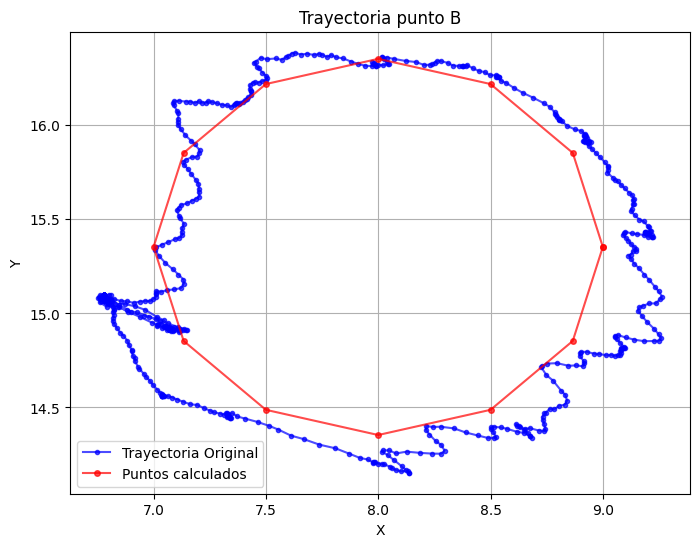

In [136]:
# Crear una sola figura
plt.figure(figsize=(8, 6))

# Graficar x vs y en azul
plt.plot(x, y, 'b-', marker='o', markersize=3, alpha=0.7, label='Trayectoria Original')

# Graficar los puntos de la función R.lamda en rojo
plt.plot(x_points, y_points, 'r-', marker='o', markersize=4, alpha=0.7, label='Puntos calculados')

# Configuración de la gráfica
plt.title("Trayectoria punto B")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()  # Agregar leyenda para distinguir las dos curvas
plt.grid(True)

# Mostrar la gráfica
plt.show()


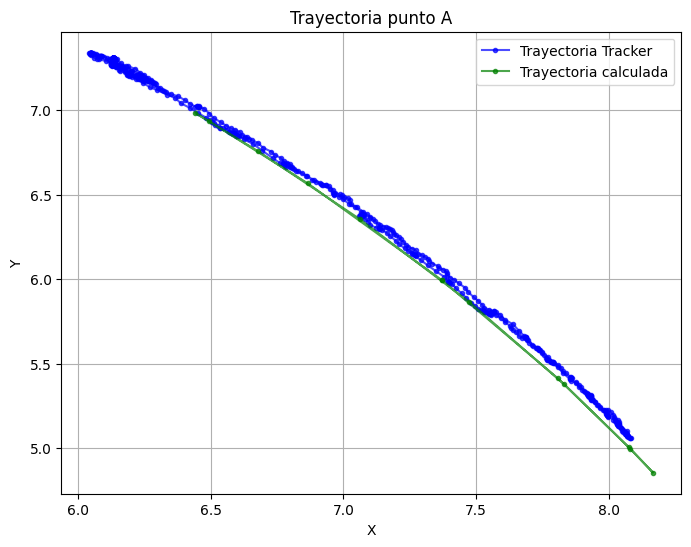

In [141]:
file_path = r"C:\Users\USUARIO\Downloads\Dinamica de Sistemas\data\Libr2.csv"

# Cargar el CSV tomando las tres primeras columnas
data = pd.read_csv(file_path, delimiter=';', usecols=[0, 1, 2])

# Renombrar las columnas correctamente
data.columns = ['t', 'x', 'y']

# Reemplazar comas por puntos y convertir a números
data = data.replace(',', '.', regex=True)
data[['t', 'x', 'y']] = data[['t', 'x', 'y']].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con NaN
data = data.dropna(subset=['t', 'x', 'y'])

# Extraer datos corregidos
t, x, y = data['t'], data['x'], data['y']
# Crear una sola figura
plt.figure(figsize=(8, 6))

# Graficar x vs y en azul
plt.plot(x, y, 'b-', marker='o', markersize=3, alpha=0.7, label='Trayectoria Tracker')

# Graficar la trayectoria seguida por el primer brazo en verde
x1_values = [l * np.cos(theta) for theta in theta_values]
y1_values = [l * np.sin(theta) for theta in theta_values]
plt.plot(x1_values, y1_values, 'g-', marker='o', markersize=3, alpha=0.7, label='Trayectoria calculada')

# Configuración de la gráfica
plt.title("Trayectoria punto A")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()  # Agregar leyenda para distinguir las dos curvas
plt.grid(True)

# Mostrar la gráfica
plt.show()


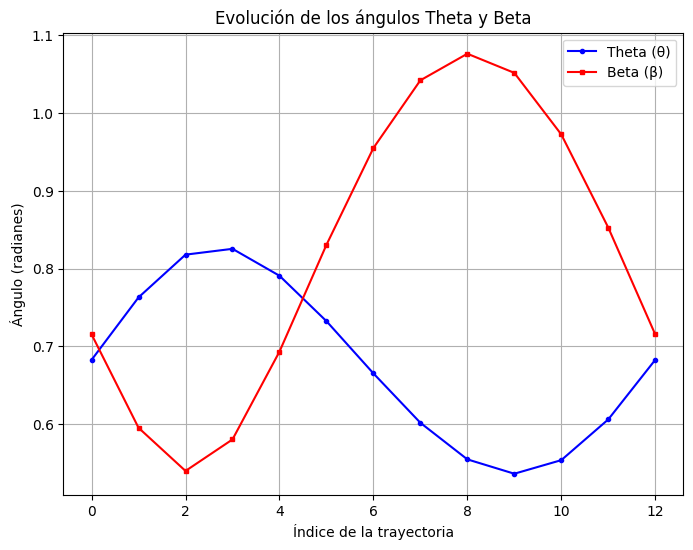

In [ ]:
# Ruta del archivo
file_path = r"C:\Users\USUARIO\Downloads\Dinamica de Sistemas\data\Libro2.csv"

# Cargar el CSV tomando las seis primeras columnas
data = pd.read_csv(file_path, delimiter=';', usecols=[0, 1, 2, 3, 4, 5])

# Renombrar las columnas correctamente
data.columns = ['t', 'x', 'y', 'theta', 'beta', 'A']

# Reemplazar comas por puntos y convertir a números
data = data.replace(',', '.', regex=True)
data[['t', 'x', 'y', 'theta', 'beta', 'A']] = data[['t', 'x', 'y', 'theta', 'beta', 'A']].apply(pd.to_numeric, errors='coerce')


# Listas para almacenar los valores de theta y beta
theta_values = []
beta_values = []

# Calcular los ángulos para cada punto de la trayectoria
for i in range(trayectoria_c.shape[1]):
    theta, beta = encontrar_angulos(trayectoria_c[0][i], trayectoria_c[1][i])  # Obtener ángulos
    theta_values.append(theta)
    beta_values.append(beta)

# Crear figura para los ángulos
plt.figure(figsize=(8, 6))

# Graficar theta en azul
plt.plot(range(len(theta_values)), theta_values, 'b-', marker='o', markersize=3, label='Theta (θ)')

# Graficar beta en rojo
plt.plot(range(len(beta_values)), beta_values, 'r-', marker='s', markersize=3, label='Beta (β)')

# Configuración del gráfico
plt.title("Evolución de los ángulos Theta y Beta")
plt.xlabel("Índice de la trayectoria")
plt.ylabel("Ángulo (radianes)")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

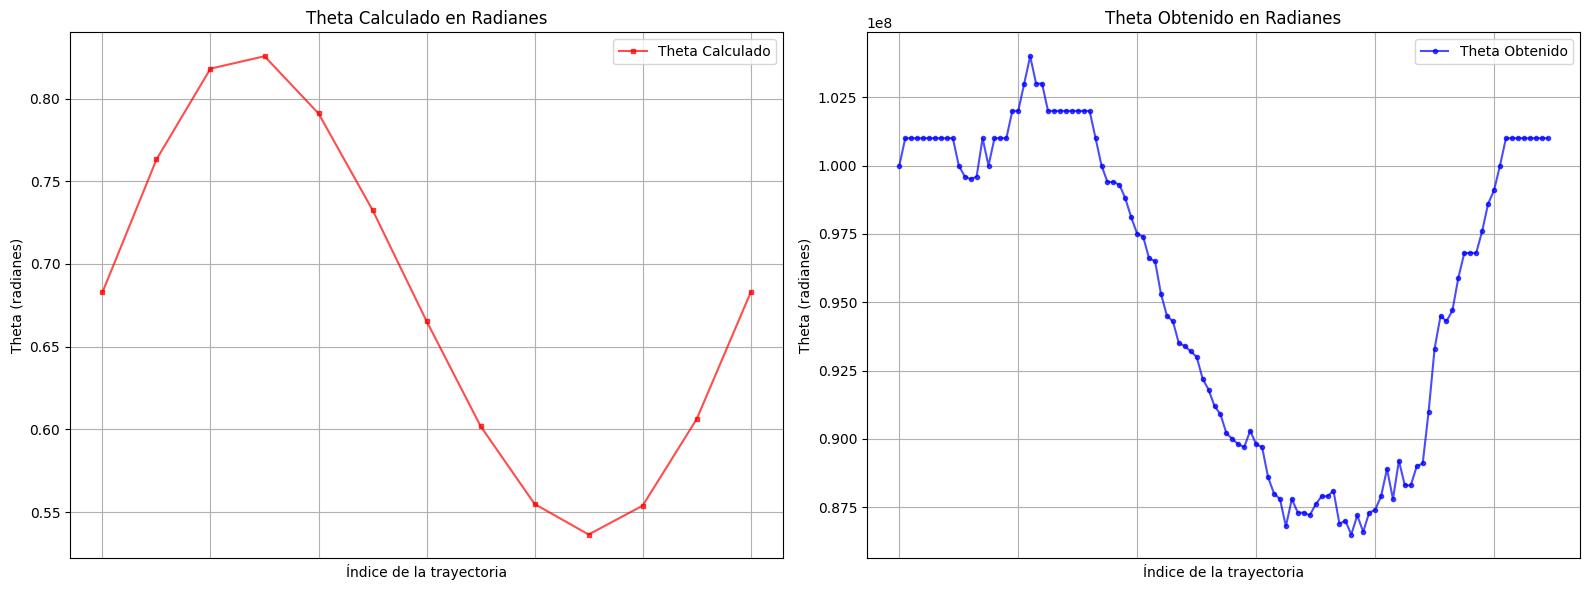

In [105]:
# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

# Graficar theta_values en radianes
axes[0].plot(range(len(theta_values)), theta_values, 'r-', marker='s', markersize=3, alpha=0.7, label='Theta Calculado')
axes[0].set_title("Theta Calculado en Radianes")
axes[0].set_xlabel("Índice de la trayectoria")
axes[0].set_ylabel("Theta (radianes)")
axes[0].legend()
axes[0].grid(True)
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Ocultar números del eje x

# Graficar theta obtenido del archivo CSV (omitiendo datos después de 110)
axes[1].plot(range(min(len(data['theta']), 110)), data['theta'][:110], 'b-', marker='o', markersize=3, alpha=0.7, label='Theta Obtenido')
axes[1].set_title("Theta Obtenido en Radianes")
axes[1].set_xlabel("Índice de la trayectoria")
axes[1].set_ylabel("Theta (radianes)")
axes[1].legend()
axes[1].grid(True)
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Ocultar números del eje x

# Ajustar el diseño para que no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


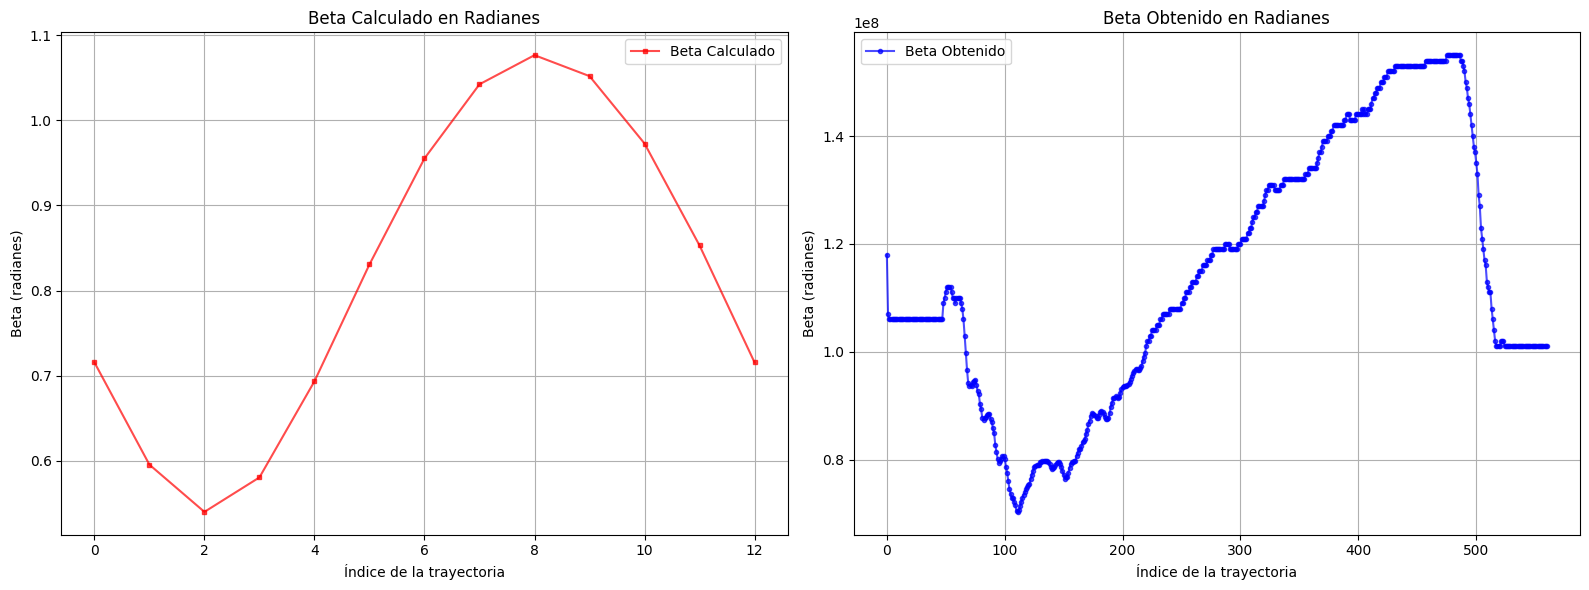

In [103]:
# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 fila, 2 columnas

# Graficar beta_values en radianes
axes[0].plot(range(len(beta_values)), beta_values, 'r-', marker='s', markersize=3, alpha=0.7, label='Beta Calculado')
axes[0].set_title("Beta Calculado en Radianes")
axes[0].set_xlabel("Índice de la trayectoria")
axes[0].set_ylabel("Beta (radianes)")
axes[0].legend()
axes[0].grid(True)

# Graficar beta obtenido del archivo CSV
axes[1].plot(range(len(data['beta'])), data['beta'], 'b-', marker='o', markersize=3, alpha=0.7, label='Beta Obtenido')
axes[1].set_title("Beta Obtenido en Radianes")
axes[1].set_xlabel("Índice de la trayectoria")
axes[1].set_ylabel("Beta (radianes)")
axes[1].legend()
axes[1].grid(True)

# Ajustar el diseño para que no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


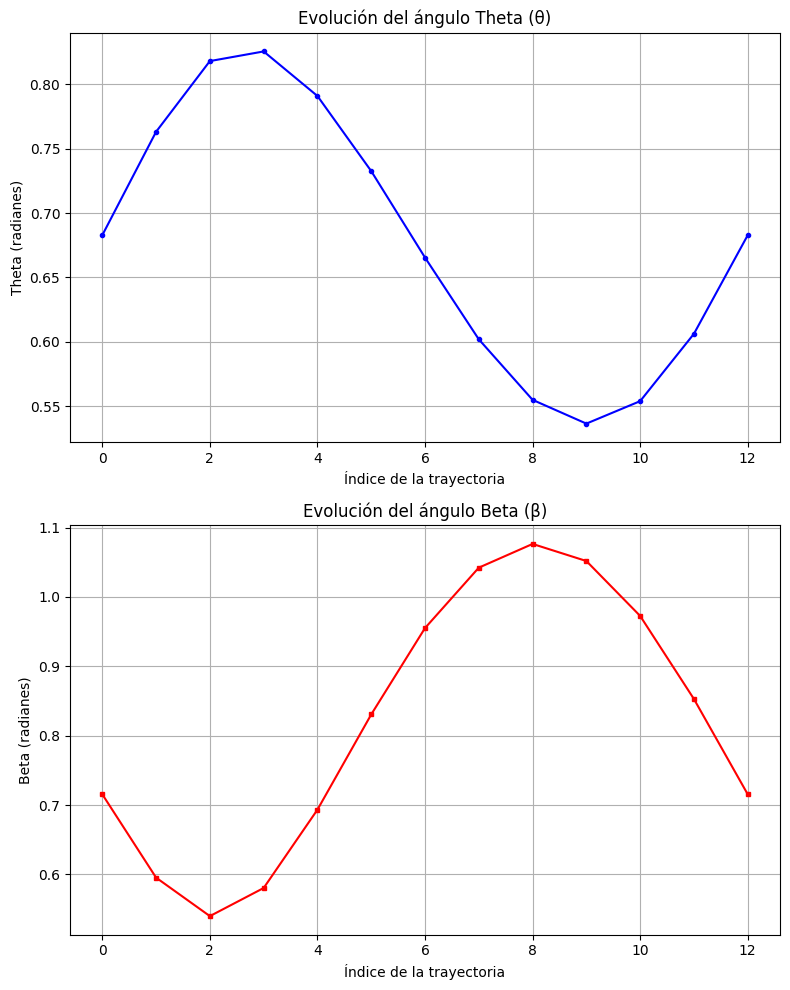

In [ ]:
# Listas para almacenar los valores de theta y beta
theta_values = []
beta_values = []

# Calcular los ángulos para cada punto de la trayectoria
for i in range(trayectoria_c.shape[1]):
    theta, beta = encontrar_angulos(trayectoria_c[0][i], trayectoria_c[1][i])  # Obtener ángulos
    theta_values.append(theta)
    beta_values.append(beta)

# Crear figura con dos subgráficos
fig, axes = plt.subplots(2, 1, figsize=(8, 10))  # 2 filas, 1 columna

# Primera gráfica: Theta (θ)
axes[0].plot(range(len(theta_values)), theta_values, 'b-', marker='o', markersize=3)
axes[0].set_title("Evolución del ángulo Theta (θ)")
axes[0].set_xlabel("Índice de la trayectoria")
axes[0].set_ylabel("Theta (radianes)")
axes[0].grid(True)

# Segunda gráfica: Beta (β)
axes[1].plot(range(len(beta_values)), beta_values, 'r-', marker='s', markersize=3)
axes[1].set_title("Evolución del ángulo Beta (β)")
axes[1].set_xlabel("Índice de la trayectoria")
axes[1].set_ylabel("Beta (radianes)")
axes[1].grid(True)

# Ajustar el diseño para que no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [109]:

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Crear la figura de la animación
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim(0, 15)  # Ajustar límites de x
ax.set_ylim(0, 20)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Brazo Robótico con Ángulos")

# Dibujar la trayectoria
ax.plot(trayectoria_x, trayectoria_y, 'k--', lw=1)

# Inicializar líneas del brazo
linea_brazo1, = ax.plot([], [], 'r-', lw=3, label="Brazo 1")
linea_brazo2, = ax.plot([], [], 'b-', lw=3, label="Brazo 2")
punto, = ax.plot([], [], 'ro')

# Inicializar marcador móvil para el punto actual en la trayectoria
marcador, = ax.plot([], [], '*', color='gold', markersize=10, label="Punto actual")
texto_marcador = ax.text(0, 0, '', fontsize=12, color='gold', weight='bold')

# Inicializar etiquetas de los ángulos
texto_theta = ax.text(0, 0, '', fontsize=12, color='red', weight='bold')
texto_beta = ax.text(0, 0, '', fontsize=12, color='blue', weight='bold')

# Función de inicialización
def init():
    linea_brazo1.set_data([], [])
    linea_brazo2.set_data([], [])
    punto.set_data([], [])
    marcador.set_data([], [])
    texto_marcador.set_text("")
    texto_theta.set_text("")
    texto_beta.set_text("")
    return linea_brazo1, linea_brazo2, punto, marcador, texto_marcador, texto_theta, texto_beta

# Función de actualización de la animación
def actualizar(i):
    x_deseado, y_deseado = trayectoria_x[i], trayectoria_y[i]
    
    angulos = encontrar_angulos(x_deseado, y_deseado)
    
    if angulos is None:
        return linea_brazo1, linea_brazo2, punto, marcador, texto_marcador, texto_theta, texto_beta
    
    theta, beta = angulos
    
    # Convertir ángulos a grados para visualizar mejor
    theta_deg = np.degrees(theta)
    beta_deg = np.degrees(beta)
    
    # Calcular posiciones de las articulaciones
    x1, y1 = l * np.cos(theta), l * np.sin(theta)
    x2, y2 = x1 + l * np.cos(theta + beta), y1 + l * np.sin(theta + beta)
    
    # Actualizar las líneas del brazo
    linea_brazo1.set_data([0, x1], [0, y1])
    linea_brazo2.set_data([x1, x2], [y1, y2])
    punto.set_data([x_deseado], [y_deseado])
    
    # Mover el marcador y actualizar su etiqueta (solución: pasar listas)
    marcador.set_data([x_deseado], [y_deseado])
    texto_marcador.set_position((x_deseado + 0.5, y_deseado + 0.5))  # Moverlo arriba a la derecha
    texto_marcador.set_text(f"n = {i+1}")

    # Actualizar posiciones y valores de los ángulos en el gráfico
    texto_theta.set_position((x1 + 0.1 / 2, y1 / 2))  # Colocar en el medio del primer brazo
    texto_theta.set_text(f"θ = {theta_deg:.1f}°")
    
    texto_beta.set_position((x1 + (x2 - x1) +0.8 / 2, y1 + (y2 - y1) / 2))  # En el medio del segundo brazo
    texto_beta.set_text(f"β = {beta_deg:.1f}°")
    
    return linea_brazo1, linea_brazo2, punto, marcador, texto_marcador, texto_theta, texto_beta

# Crear la animación
anim = FuncAnimation(fig, actualizar, frames=num_puntos, init_func=init, blit=False, interval=300)
plt.close('all')
# Mostrar la animación en Jupyter Notebook
HTML(anim.to_jshtml())
